In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import seaborn as sns

In [2]:
df1 = pd.read_csv('../project_dataset/extract - fees - data analyst.csv')

# Load the second CSV file
df2 = pd.read_csv('../project_dataset/extract - cash request - data analyst.csv')


In [7]:
import pandas as pd

# Convert 'created_at' to datetime to analyze over time
df1['created_at'] = pd.to_datetime(df1['created_at'])
df2['created_at'] = pd.to_datetime(df2['created_at'])

# Frequency of CR requests over time - df2
df2['created_month'] = df2['created_at'].dt.to_period('M')
service_usage_df2 = df2.groupby('created_month').size()
print(service_usage_df2)


created_month
2019-11       1
2019-12     289
2020-01     223
2020-02     184
2020-03     244
2020-04     473
2020-05     837
2020-06    2615
2020-07    3601
2020-08    3417
2020-09    4221
2020-10    7725
2020-11     140
Freq: M, dtype: int64


/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_16286/175370699.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df2['created_month'] = df2['created_at'].dt.to_period('M')


In [8]:
# Distribution of statuses - df1
status_distribution_df1 = df1['status'].value_counts()
print(status_distribution_df1)


status
accepted     14841
cancelled     4938
rejected      1194
confirmed       88
Name: count, dtype: int64


In [10]:
# Calculating incident rate for payments - df1
incident_types_df1 = df1[df1['type'] == 'incident']
incident_rate_df1 = incident_types_df1['category'].value_counts(normalize=True)
print(incident_rate_df1)

category
rejected_direct_debit     0.728142
month_delay_on_payment    0.271858
Name: proportion, dtype: float64


In [11]:
# Incident handling in CR - df2
incident_count_df2 = df2['recovery_status'].value_counts(normalize=True)
print(incident_count_df2)

recovery_status
completed               0.741141
pending                 0.253754
pending_direct_debit    0.004805
cancelled               0.000300
Name: proportion, dtype: float64


In [13]:
# Revenue generated from fees - df1
monthly_revenue_df1 = df1.groupby(df1['created_at'].dt.to_period('M'))['total_amount'].sum()
print(monthly_revenue_df1)


created_at
2020-05       80.0
2020-06     3845.0
2020-07     8095.0
2020-08    15260.0
2020-09    22860.0
2020-10    53835.0
2020-11     1335.0
Freq: M, Name: total_amount, dtype: float64


/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_16286/306932192.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_revenue_df1 = df1.groupby(df1['created_at'].dt.to_period('M'))['total_amount'].sum()


In [14]:
# Revenue from CR requests - df2
monthly_revenue_df2 = df2.groupby(df2['created_at'].dt.to_period('M'))['amount'].sum()
print(monthly_revenue_df2)


created_at
2019-11         1.0
2019-12     27297.0
2020-01     21587.0
2020-02     16653.0
2020-03     23549.0
2020-04     46093.0
2020-05     79236.0
2020-06    246026.0
2020-07    328187.0
2020-08    287633.0
2020-09    336507.0
2020-10    559339.0
2020-11     10710.0
Freq: M, Name: amount, dtype: float64


/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_16286/3832597928.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_revenue_df2 = df2.groupby(df2['created_at'].dt.to_period('M'))['amount'].sum()


In [15]:
# Average Fee Per Transaction - df1
df1_confirmed = df1[df1['status'] == 'accepted']
avg_fee_per_transaction = df1_confirmed['total_amount'].mean()
print(f'Average Fee Per Transaction: {avg_fee_per_transaction}')


Average Fee Per Transaction: 5.000336904521259


In [16]:
# Average amount per successful transaction - df2
df2_successful = df2[df2['status'] == 'active']
avg_transaction_amount = df2_successful['amount'].mean()
print(f'Average Transaction Amount: {avg_transaction_amount}')

Average Transaction Amount: 86.52542372881356


In [17]:
import pandas as pd
import numpy as np

# Convert date columns to datetime for both DataFrames
df1['created_at'] = pd.to_datetime(df1['created_at'])
df2['created_at'] = pd.to_datetime(df2['created_at'])

# Fill NaN values for correlation purposes, if necessary
df1.fillna(0, inplace=True)
df2.fillna(0, inplace=True)

In [18]:
# Correlation matrix for df1
corr_matrix_df1 = df1.corr()

# Correlation matrix for df2
corr_matrix_df2 = df2.corr()

print("DF1 Correlation Matrix:")
print(corr_matrix_df1)

print("\nDF2 Correlation Matrix:")
print(corr_matrix_df2)

ValueError: could not convert string to float: 'instant_payment'

In [19]:
import pandas as pd

# Example: Initialize DataFrames with data
# df1 = pd.read_csv('path_to_file.csv')  # Replace with your file or data source
# df2 = pd.read_csv('path_to_file.csv')  # Replace with your file or data source

print("DF1 Head:\n", df1.head())
print("\nDF2 Head:\n", df2.head())

DF1 Head:
       id  cash_request_id             type    status               category  \
0   6537          14941.0  instant_payment  rejected                      0   
1   6961          11714.0         incident  accepted  rejected_direct_debit   
2  16296          23371.0  instant_payment  accepted                      0   
3  20775          26772.0  instant_payment  accepted                      0   
4  11242          19350.0  instant_payment  accepted                      0   

   total_amount                              reason  \
0           5.0  Instant Payment Cash Request 14941   
1           5.0               rejected direct debit   
2           5.0  Instant Payment Cash Request 23371   
3           5.0  Instant Payment Cash Request 26772   
4           5.0  Instant Payment Cash Request 19350   

                        created_at                     updated_at  \
0 2020-09-07 10:47:27.423150+00:00  2020-10-13 14:25:09.396112+00   
1 2020-09-09 20:51:17.998653+00:00  2020-10-1

In [20]:
print("DF1 Columns:\n", df1.dtypes)
print("\nDF2 Columns:\n", df2.dtypes)

DF1 Columns:
 id                               int64
cash_request_id                float64
type                            object
status                          object
category                        object
total_amount                   float64
reason                          object
created_at         datetime64[ns, UTC]
updated_at                      object
paid_at                         object
from_date                       object
to_date                         object
charge_moment                   object
dtype: object

DF2 Columns:
 id                                          int64
amount                                    float64
status                                     object
created_at                    datetime64[ns, UTC]
updated_at                                 object
user_id                                   float64
moderated_at                               object
deleted_account_id                        float64
reimbursement_date                         object


In [22]:
import pandas as pd

# Assuming df1 and df2 are your DataFrames

# Select only numeric columns for correlation
numeric_df1 = df1.select_dtypes(include=[float, int])
numeric_df2 = df2.select_dtypes(include=[float, int])

# Compute correlation matrices
corr_matrix_df1 = numeric_df1.corr()
corr_matrix_df2 = numeric_df2.corr()

# Display correlation matrices
print("DF1 Correlation Matrix:")
print(corr_matrix_df1)

print("\nDF2 Correlation Matrix:")
print(corr_matrix_df2)

DF1 Correlation Matrix:
                       id  cash_request_id  total_amount
id               1.000000         0.884152      0.005544
cash_request_id  0.884152         1.000000      0.006709
total_amount     0.005544         0.006709      1.000000

DF2 Correlation Matrix:
                          id    amount   user_id  deleted_account_id
id                  1.000000 -0.363045  0.699699           -0.040324
amount             -0.363045  1.000000 -0.287400           -0.017842
user_id             0.699699 -0.287400  1.000000           -0.249670
deleted_account_id -0.040324 -0.017842 -0.249670            1.000000


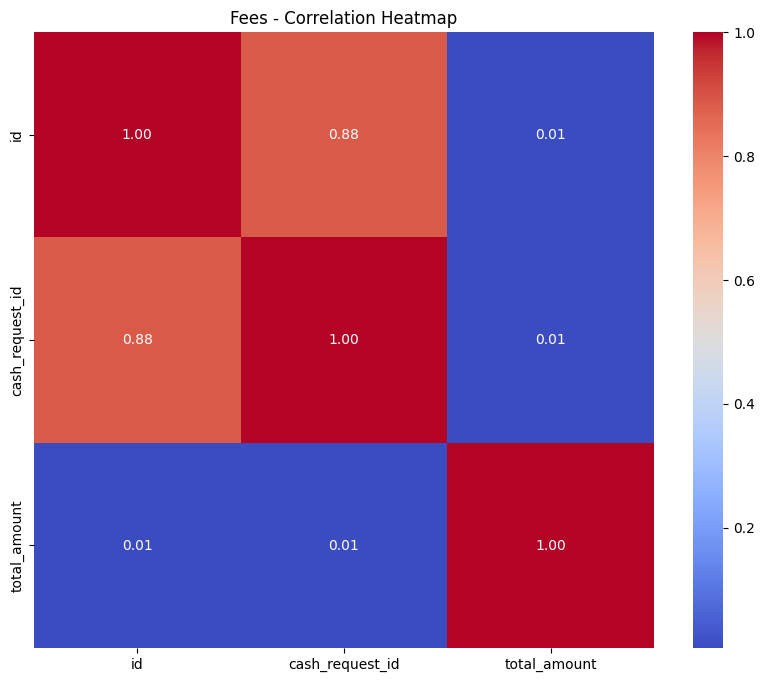

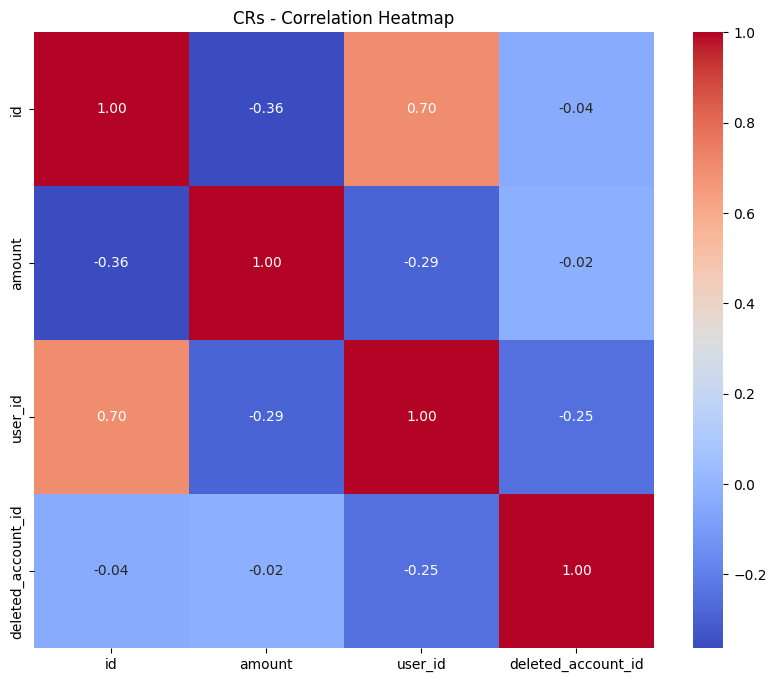

In [24]:
# Heatmap for df1
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_df1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Fees - Correlation Heatmap')
plt.show()

# Heatmap for df2
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_df2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('CRs - Correlation Heatmap')
plt.show()

/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_16286/3124979145.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df2['created_at'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')


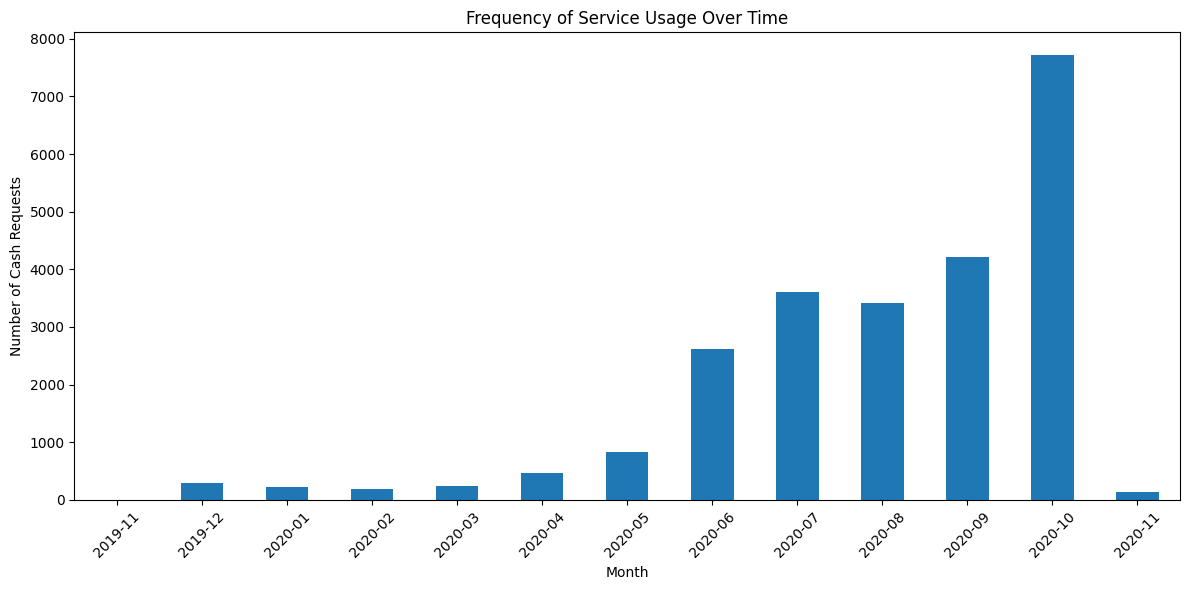

In [26]:
# Convert 'created_at' to datetime format in df2
df2['created_at'] = pd.to_datetime(df2['created_at'])

# Plot the frequency of service usage over time
plt.figure(figsize=(12, 6))
df2['created_at'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Frequency of Service Usage Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Cash Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_16286/1814890675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df1, order=df1['category'].value_counts().index, palette='viridis')


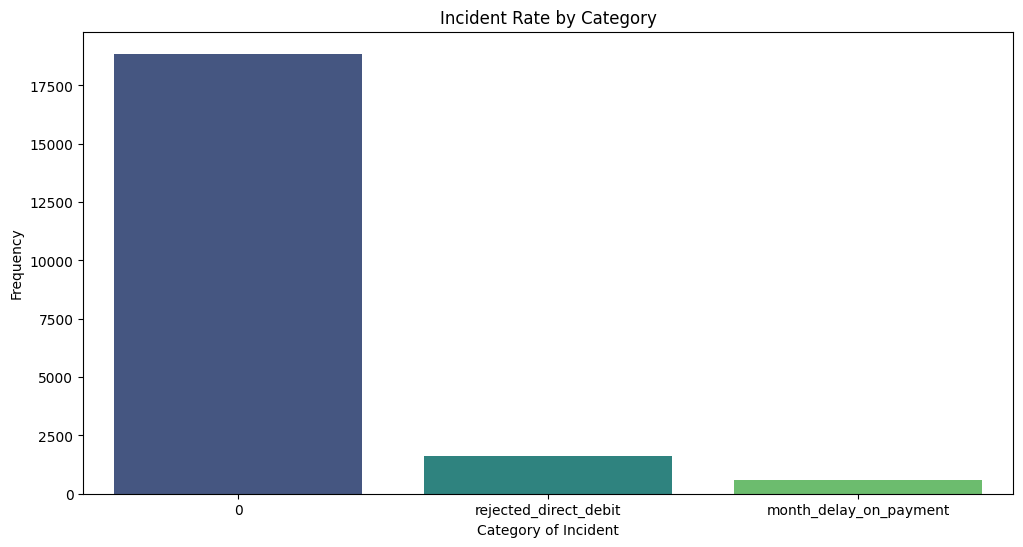

In [27]:
# Plot the incident rate focused on cohorts
plt.figure(figsize=(12, 6))
sns.countplot(x='category', data=df1, order=df1['category'].value_counts().index, palette='viridis')
plt.title('Incident Rate by Category')
plt.xlabel('Category of Incident')
plt.ylabel('Frequency')
plt.show()

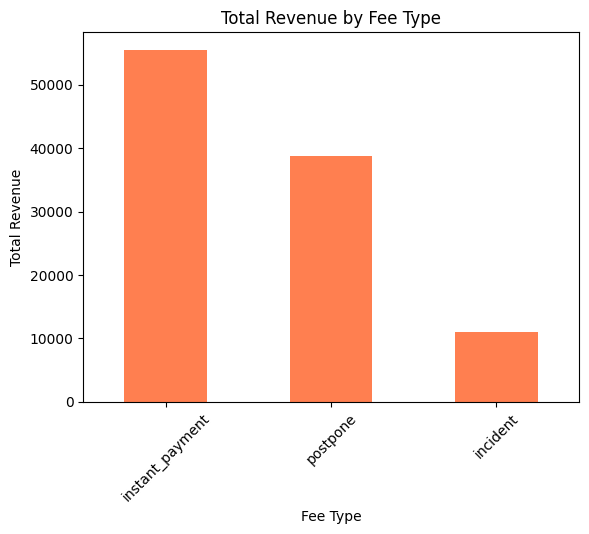

In [28]:
# Group by cohort and calculate total revenue
revenue_by_type = df1.groupby('type')['total_amount'].sum().sort_values(ascending=False)

# Plot the revenue by type
revenue_by_type.plot(kind='bar', color='coral')
plt.title('Total Revenue by Fee Type')
plt.xlabel('Fee Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Average Processing Time: 75.38135168961202 days


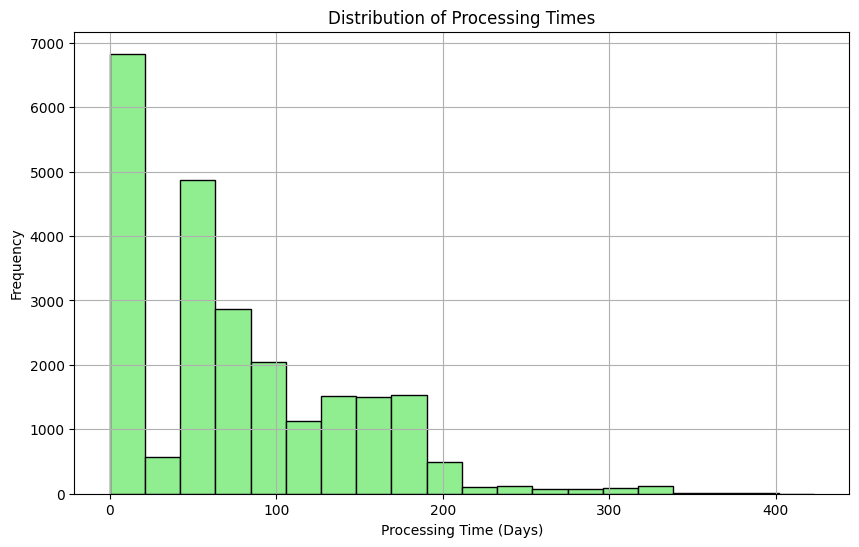

In [29]:
# Convert strings to datetime
df2['created_at'] = pd.to_datetime(df2['created_at'])
df2['updated_at'] = pd.to_datetime(df2['updated_at'])

# Calculate processing time in days
df2['processing_time_days'] = (df2['updated_at'] - df2['created_at']).dt.days

# Average processing time
average_processing_time = df2['processing_time_days'].mean()
print(f"Average Processing Time: {average_processing_time} days")

# Histogram of processing times
plt.figure(figsize=(10, 6))
df2['processing_time_days'].hist(bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Processing Times')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()

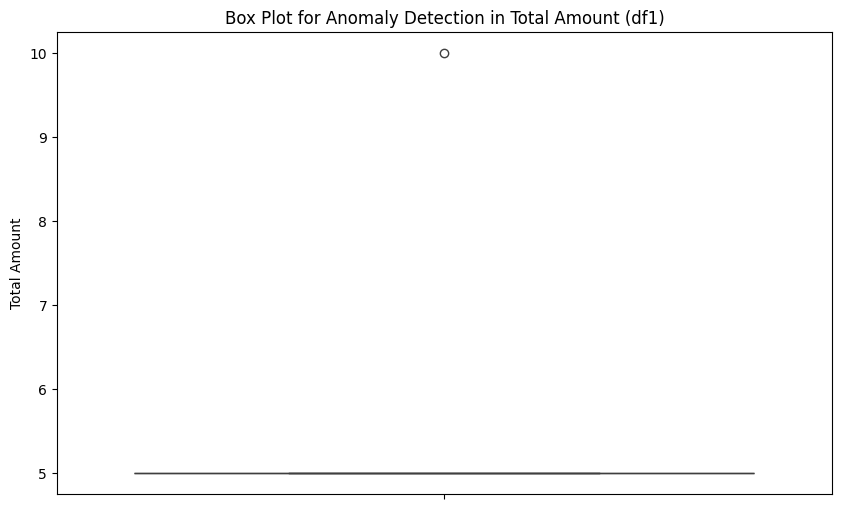

In [30]:
# Box plot to detect outliers in 'total_amount'
plt.figure(figsize=(10, 6))
sns.boxplot(y='total_amount', data=df1)
plt.title('Box Plot for Anomaly Detection in Total Amount (df1)')
plt.ylabel('Total Amount')
plt.show()

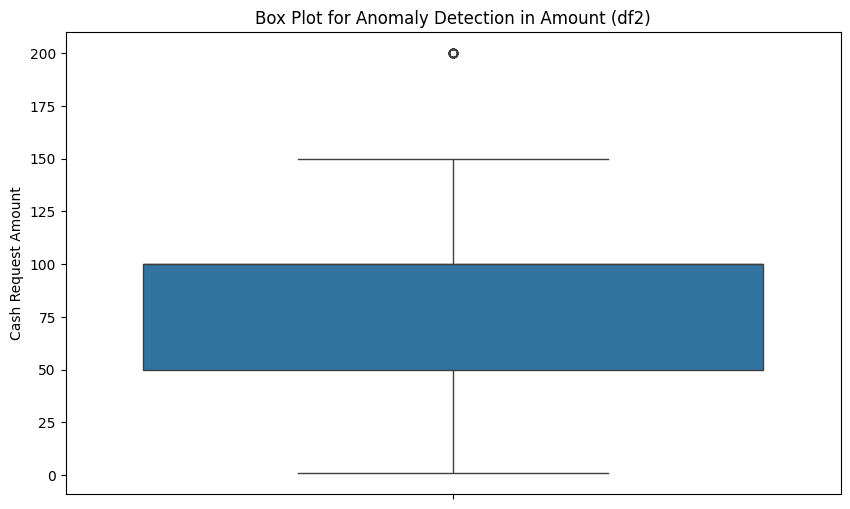

In [31]:
# Box plot to detect outliers in 'amount'
plt.figure(figsize=(10, 6))
sns.boxplot(y='amount', data=df2)
plt.title('Box Plot for Anomaly Detection in Amount (df2)')
plt.ylabel('Cash Request Amount')
plt.show()

/var/folders/r6/ycxt4t395sz7rs26t5w0vjgc0000gn/T/ipykernel_16286/1164868016.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df2['created_at'].dt.to_period('W').value_counts().sort_index().plot(kind='bar')


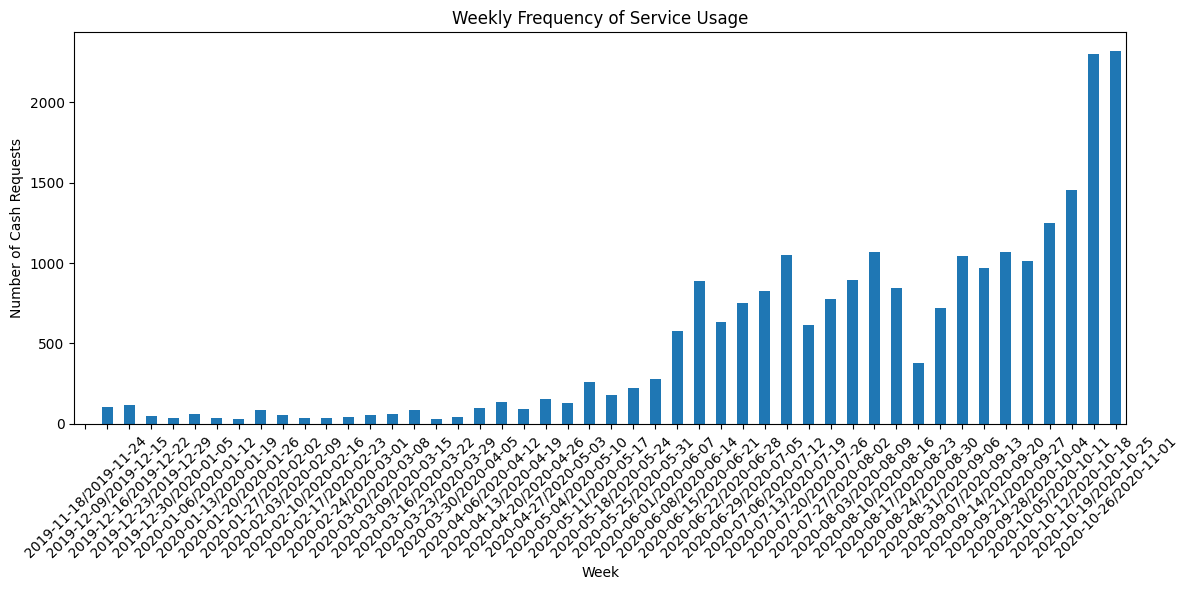

In [32]:
# Convert 'created_at' to datetime
df2['created_at'] = pd.to_datetime(df2['created_at'])

# Plot the frequency of service usage
plt.figure(figsize=(12, 6))
# Weekly frequency
df2['created_at'].dt.to_period('W').value_counts().sort_index().plot(kind='bar')
plt.title('Weekly Frequency of Service Usage')
plt.xlabel('Week')
plt.ylabel('Number of Cash Requests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

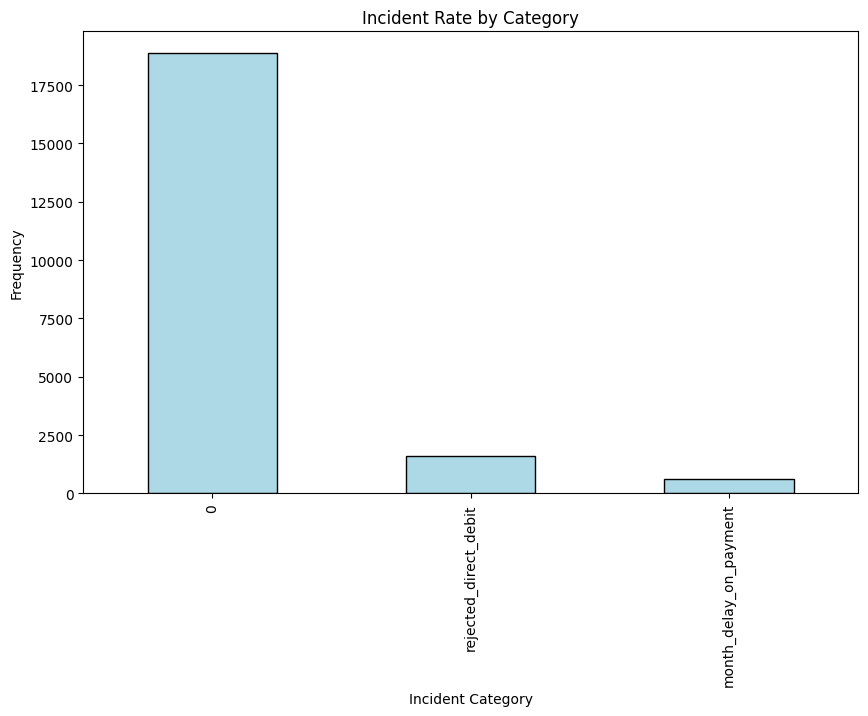

In [33]:
# Bar chart for incident categories
plt.figure(figsize=(10, 6))
df1['category'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Incident Rate by Category')
plt.xlabel('Incident Category')
plt.ylabel('Frequency')
plt.show()

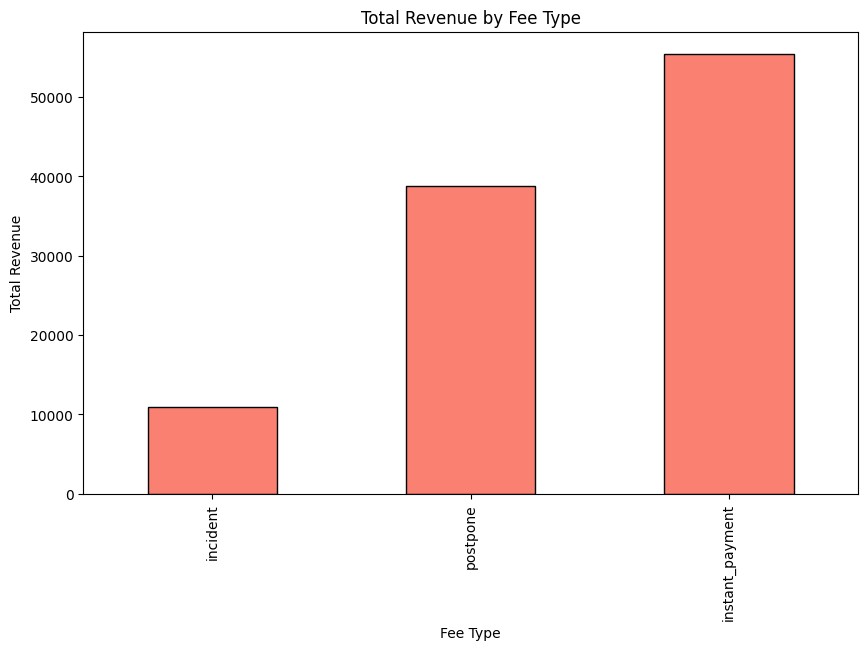

In [34]:
# Calculate total revenue by type
revenue_by_type = df1.groupby('type')['total_amount'].sum().sort_values()

# Plot total revenue by type
plt.figure(figsize=(10, 6))
revenue_by_type.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Total Revenue by Fee Type')
plt.xlabel('Fee Type')
plt.ylabel('Total Revenue')
plt.show()